<a href="https://colab.research.google.com/github/aditiijaiswal/movie-recommendation-system-using-cosine-similarity/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [172]:
import csv
import re
import numpy as np
import pandas as pd
import difflib #for finding close match of the inputted movie name from the datset since there could be spelling errors etc. in the input
from sklearn.feature_extraction.text import TfidfVectorizer #used to convert text into numeric values
from sklearn.metrics.pairwise import cosine_similarity #for finding similarity confidence score for all the movies with each other
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
import random 

Data Collection and Pre-Processing

In [173]:
# loading the data from the csv file to a pandas dataframe
movies_data = pd.read_csv('/content/movies.csv')

In [174]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [175]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [176]:
# number of rows and columns in the data frame
movies_data.shape

(4803, 24)

In [177]:
movies_data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [178]:
print(movies_data.describe)

<bound method NDFrame.describe of       index     budget                                    genres  \
0         0  237000000  Action Adventure Fantasy Science Fiction   
1         1  300000000                  Adventure Fantasy Action   
2         2  245000000                    Action Adventure Crime   
3         3  250000000               Action Crime Drama Thriller   
4         4  260000000          Action Adventure Science Fiction   
...     ...        ...                                       ...   
4798   4798     220000                     Action Crime Thriller   
4799   4799       9000                            Comedy Romance   
4800   4800          0             Comedy Drama Romance TV Movie   
4801   4801          0                                       NaN   
4802   4802          0                               Documentary   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http

In [179]:
movies_data.nunique()

index                   4803
budget                   436
genres                  1168
homepage                1691
id                      4803
keywords                4219
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
cast                    4741
crew                    4776
director                2349
dtype: int64

NULL VALUE ANALYSIS

In [180]:
movies_data.isnull()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4799,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4801,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [181]:
movies_data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64


Preview of data with null values:
xxxxxxxxxxxxx
    index     budget                                    genres  \
10     10  270000000  Adventure Fantasy Action Science Fiction   
15     15  225000000                  Adventure Family Fantasy   
24     24  207000000                    Adventure Drama Action   

                   homepage    id  \
10  http://www.superman.com  1452   
15                      NaN  2454   
24                      NaN   254   

                                             keywords original_language  \
10  saving the world dc comics invulnerability seq...                en   
15  based on novel fictional place brother sister ...                en   
24  film business screenplay show business film ma...                en   

                              original_title  \
10                          Superman Returns   
15  The Chronicles of Narnia: Prince Caspian   
24                                 King Kong   

                                           

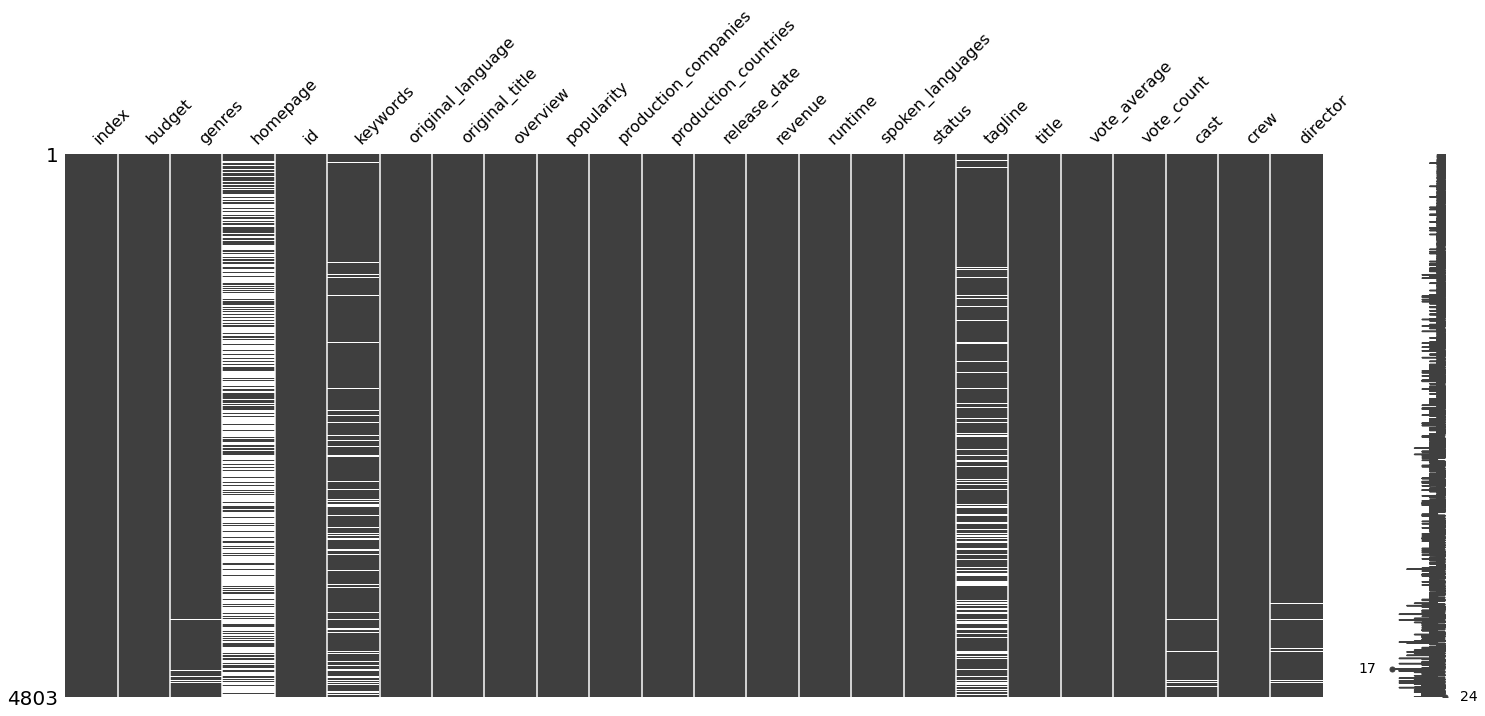

In [182]:
if movies_data.isnull().any(axis=None): 
  print("\nPreview of data with null values:\nxxxxxxxxxxxxx") 
  print(movies_data[movies_data.isnull().any(axis=1)].head(3)) 
  missingno.matrix(movies_data) 
  plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
    index     budget                                    genres  \
10     10  270000000  Adventure Fantasy Action Science Fiction   
15     15  225000000                  Adventure Family Fantasy   
24     24  207000000                    Adventure Drama Action   

                   homepage    id  \
10  http://www.superman.com  1452   
15                      NaN  2454   
24                      NaN   254   

                                             keywords original_language  \
10  saving the world dc comics invulnerability seq...                en   
15  based on novel fictional place brother sister ...                en   
24  film business screenplay show business film ma...                en   

                              original_title  \
10                          Superman Returns   
15  The Chronicles of Narnia: Prince Caspian   
24                                 King Kong   

                                           

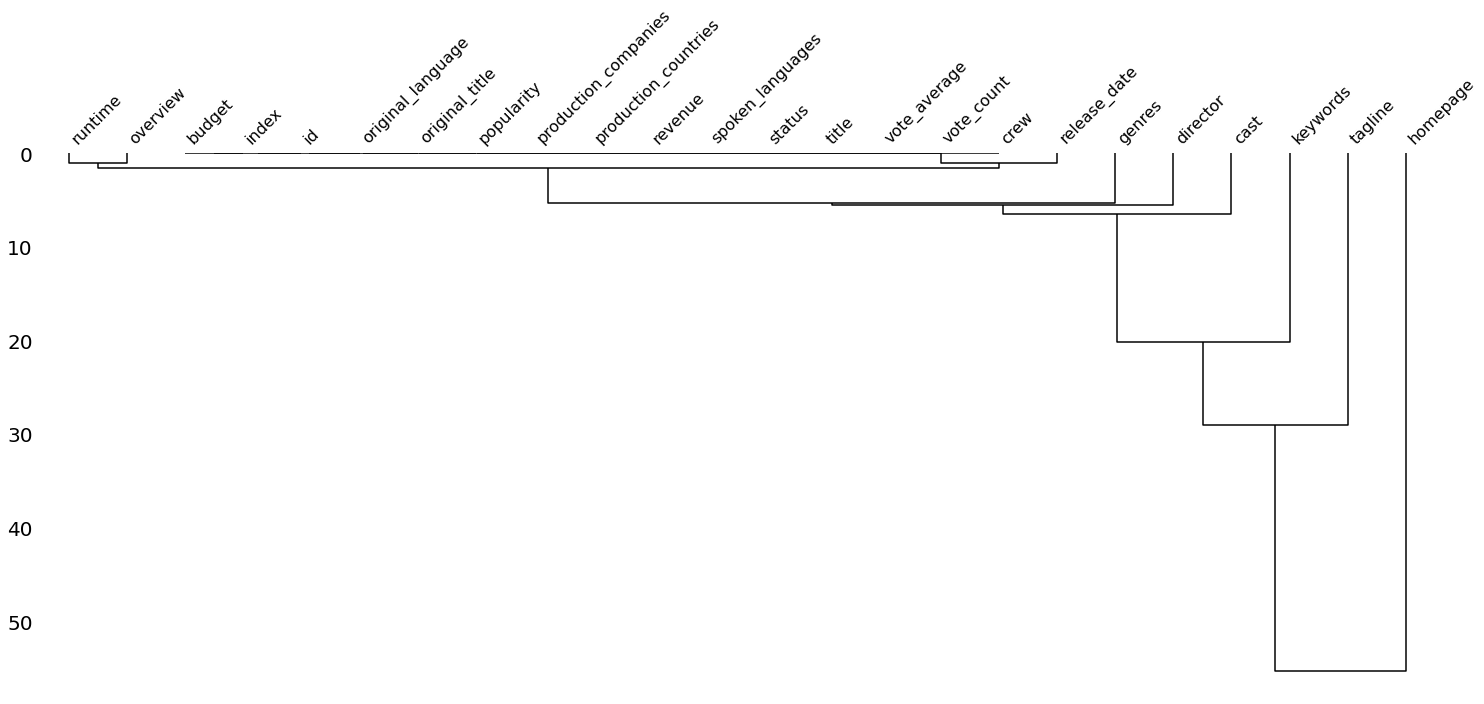

In [183]:
if movies_data.isnull().any(axis=None): 
  print("\nPreview of data with null values:\nxxxxxxxxxxxxx") 
  print(movies_data[movies_data.isnull().any(axis=1)].head(3)) 
  missingno.dendrogram(movies_data) 
  plt.show()


Preview of data with null values:
xxxxxxxxxxxxx
    index     budget                                    genres  \
10     10  270000000  Adventure Fantasy Action Science Fiction   
15     15  225000000                  Adventure Family Fantasy   
24     24  207000000                    Adventure Drama Action   

                   homepage    id  \
10  http://www.superman.com  1452   
15                      NaN  2454   
24                      NaN   254   

                                             keywords original_language  \
10  saving the world dc comics invulnerability seq...                en   
15  based on novel fictional place brother sister ...                en   
24  film business screenplay show business film ma...                en   

                              original_title  \
10                          Superman Returns   
15  The Chronicles of Narnia: Prince Caspian   
24                                 King Kong   

                                           

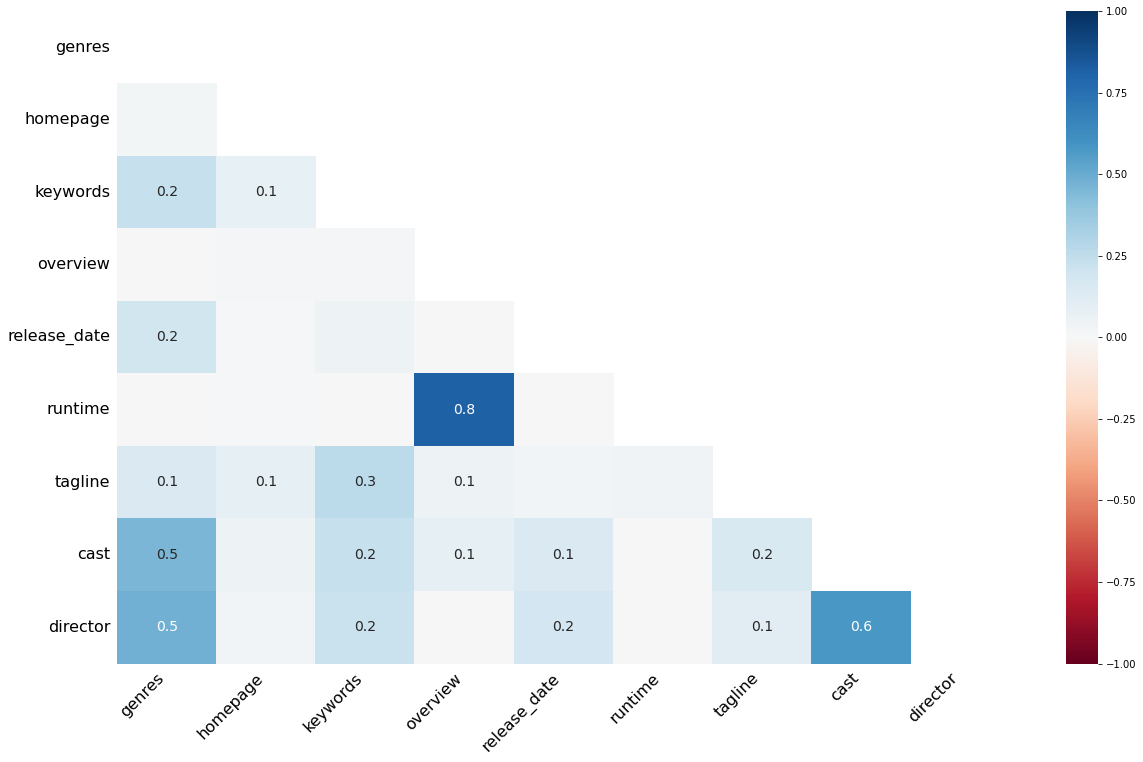

In [184]:
if movies_data.isnull().any(axis=None): 
  print("\nPreview of data with null values:\nxxxxxxxxxxxxx") 
  print(movies_data[movies_data.isnull().any(axis=1)].head(3)) 
  missingno.heatmap(movies_data) 
  plt.show()

PREPARING DATA FOR PERFORMING EXPLORATORY DATA ANALYSIS

In [185]:
display(movies_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
index,4803.0,2.401000e+03,1.386651e+03,0.0,1200.50000,2.401000e+03,3.601500e+03,4.802000e+03
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [186]:
print(movies_data['vote_average'].unique())

[ 7.2  6.9  6.3  7.6  6.1  5.9  7.4  7.3  5.7  5.4  7.   6.5  6.4  6.2
  7.1  5.8  6.6  7.5  5.5  6.7  6.8  6.   5.1  7.8  5.6  5.2  8.2  7.7
  5.3  8.   4.8  4.9  7.9  8.1  4.7  5.   4.2  4.4  4.1  3.7  3.6  3.
  3.9  4.3  4.5  3.4  4.6  8.3  3.5  4.   2.3  3.2  0.   3.8  2.9  8.5
  1.9  3.1  3.3  2.2  0.5  9.3  8.4  2.7 10.   1.   2.   2.8  9.5  2.6
  2.4]


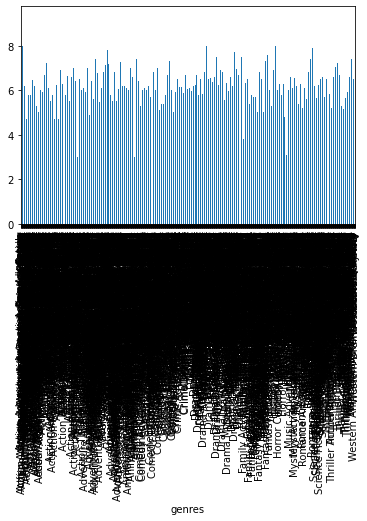

In [187]:
movies_data.groupby('genres')['vote_average'].mean().plot.bar() 
plt.show()

EXPLORATORY DATA ANALYSIS WITH THE HELP OF VISUALIZATIONS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


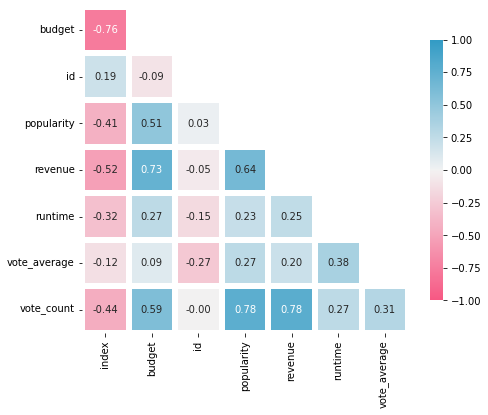

In [188]:
data_corr = movies_data.corr() 
fig, ax = plt.subplots(figsize=(8, 6)) 

# mask 
mask = np.triu(np.ones_like(data_corr, dtype=np.bool)) 

# adjust mask and df 
mask = mask[1:, :-1] 
corr = data_corr.iloc[1:,:-1].copy() 

# color map 
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True) 

# plot heatmap 
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
            linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
            cbar_kws={"shrink": .8}, square=True) 

# ticks 
yticks = [i.upper() for i in corr.index] 
xticks = [i.upper() for i in corr.columns]

In [189]:
age_groups = pd.DataFrame(movies_data['vote_average'].value_counts()).reset_index() 
age_groups = age_groups.rename(columns={'index':'vote_average', 'vote_average':'Count'}) 
age_groups

,vote_average,Count
0,6.5,216
1,6.0,216
2,6.7,213
3,6.3,207
4,6.1,201
...,...,...
66,2.7,1
67,0.5,1
68,2.2,1
69,1.9,1


Text(0.14, 0.95, 'Distribution of Movies based on Ratings')

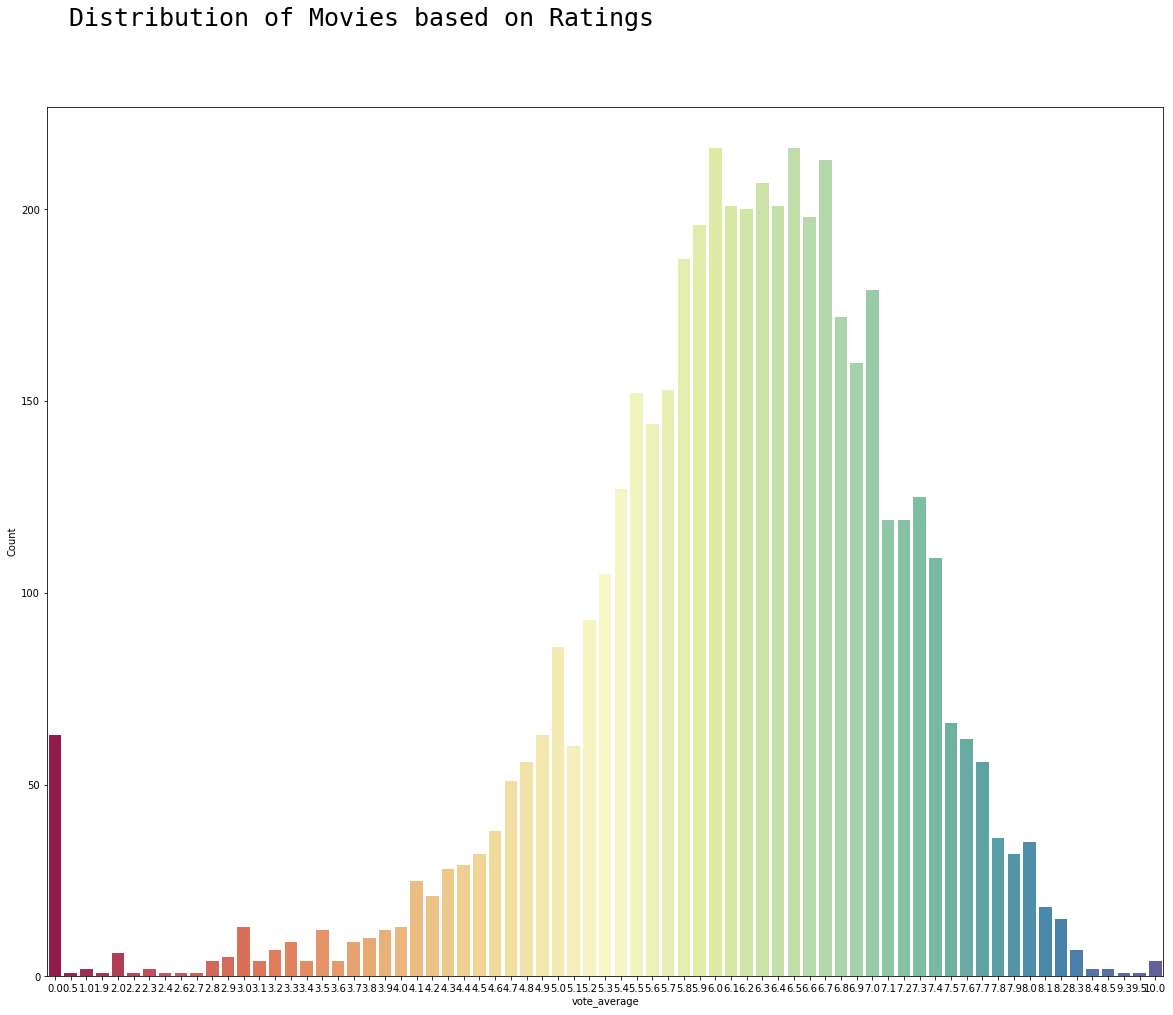

In [190]:
plt.figure(figsize = (20,16)) 
a = sns.barplot(x='vote_average', y='Count', data = age_groups, palette='Spectral',linewidth=3) 
plt.figtext(x=0.14, y=0.95, s='Distribution of Movies based on Ratings', fontsize=25, fontname='monospace')

GENRE BASED ANALYSIS

In [212]:
#SEPERATING GENRE
unique_genre=[]

g=movies_data['genres']

for i in g:
  x=i.split()
  for j in x:
    unique_genre.append(j)

l2=set(unique_genre)
unique_genre=list(l2)
print(unique_genre)

['Action', 'Fantasy', 'Mystery', 'Adventure', 'Animation', 'War', 'TV', 'Documentary', 'Science', 'Music', 'Thriller', 'Horror', 'Drama', 'Comedy', 'Romance', 'Movie', 'Western', 'History', 'Fiction', 'Crime', 'Family', 'Foreign']


In [213]:
#genre count
genre_count={}
for g in unique_genre:
  c=0
  for i in movies_data['genres']:
    x=i.split()
    if g in x:
      c=c+1
  print(g,": ",c)
  genre_count[g]=c;


Action :  1153
Fantasy :  418
Mystery :  347
Adventure :  790
Animation :  234
War :  142
TV :  8
Documentary :  110
Science :  530
Music :  183
Thriller :  1259
Horror :  519
Drama :  2297
Comedy :  1722
Romance :  890
Movie :  8
Western :  80
History :  197
Fiction :  530
Crime :  696
Family :  510
Foreign :  34


In [214]:
#sorting most popular genres
sorted_value_index = np.argsort(genre_count.values())
dictionary_keys = list(genre_count.keys())
sorted_genre_count = {dictionary_keys[i]: sorted(
    genre_count.values(), reverse=True)[i] for i in range(len(dictionary_keys))}
 
#genre_count_df = pd.DataFrame.from_dict(sorted_genre_count, orient ='index')
sorted_count=list(sorted_genre_count.values())
sorted_genre=list(sorted_genre_count.keys())

genre_count_df=pd.DataFrame(list(zip(sorted_genre,sorted_count))) 
genre_count_df.columns=['Genre','Count']
print(genre_count_df)


          Genre  Count
0        Action   2297
1       Fantasy   1722
2       Mystery   1259
3     Adventure   1153
4     Animation    890
5           War    790
6            TV    696
7   Documentary    530
8       Science    530
9         Music    519
10     Thriller    510
11       Horror    418
12        Drama    347
13       Comedy    234
14      Romance    197
15        Movie    183
16      Western    142
17      History    110
18      Fiction     80
19        Crime     34
20       Family      8
21      Foreign      8


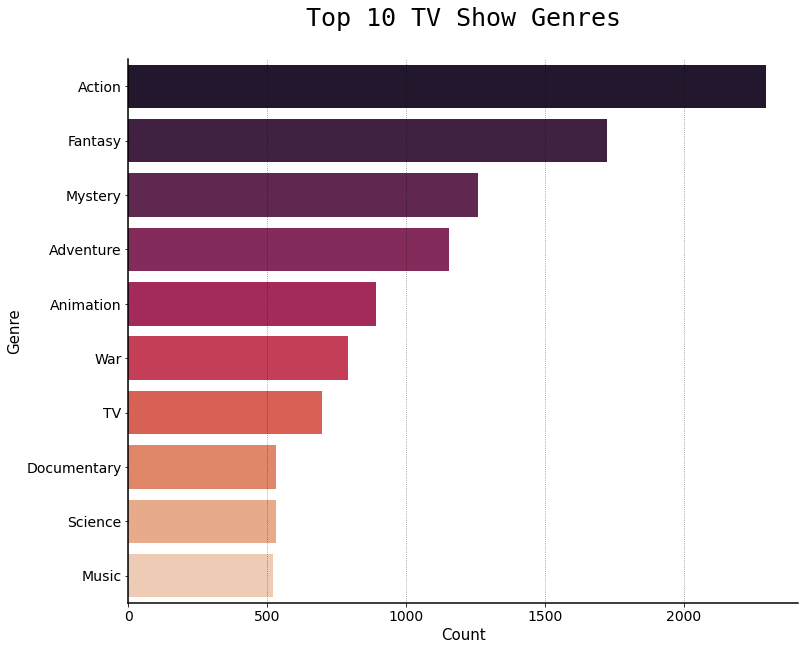

In [215]:
#top ten movie genres
plt.figure(figsize=(12,10)) 
plt.grid(axis='x',color='black', linestyle = ':', alpha=0.5) 
plt.title('Top 10 TV Show Genres', fontname='monospace', fontsize=25, y=1.05) 
a = sns.barplot(x="Count", y="Genre", data=genre_count_df[:10], palette='rocket') 

for q in [a]: 
  for w in ['bottom', 'left']: 
    q.spines[w].set_linewidth(1.5) 
  for w in ['right', 'top']: 
    q.spines[w].set_visible(False) 
    
plt.xlabel('Count', fontsize=15) 
plt.ylabel('Genre', fontsize=15) 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

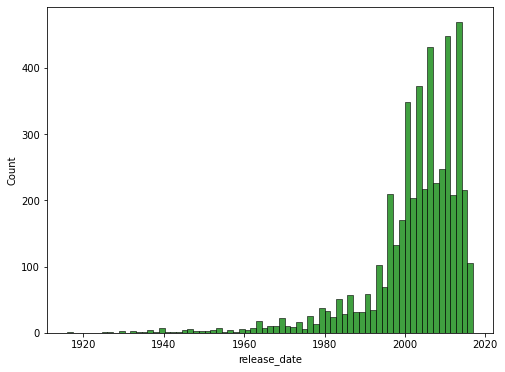

In [216]:
#highest count of movies released

plt.subplots(figsize=(8,6)) 
sns.histplot(pd.DatetimeIndex(movies_data["release_date"]).year,kde=False, color="green") 

MOVIE RECOMMENDATION

In [192]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [193]:
# replacing the null valuess with null string in the above 4 columns alone

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [194]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [195]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [196]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [197]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [198]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

Cosine Similarity

In [199]:
# getting the similarity scores using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [200]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [201]:
print(similarity.shape)

(4803, 4803)


In [202]:
# creating a list with all the movie names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

Getting the movie name from the user

In [203]:
# getting the movie name from the user

movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : pacific rim


In [204]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Pacific Rim']


In [205]:
close_match = find_close_match[0]
print(close_match)

Pacific Rim


In [206]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

51


In [207]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.029386383074054313), (1, 0.01608752416788112), (2, 0.012023463793038439), (3, 0.005662469614193326), (4, 0.028614917404666505), (5, 0.012173811646169385), (6, 0.07987845193412763), (7, 0.029661742129023158), (8, 0.006899901770618336), (9, 0.011588971572848817), (10, 0.03305291565921547), (11, 0.010439565727701973), (12, 0.039991363286109534), (13, 0.010833481286876868), (14, 0.029194897277273195), (15, 0.0063780871694352065), (16, 0.02812563673324002), (17, 0.011478490706880444), (18, 0.021693800581922593), (19, 0.010191037366555054), (20, 0.011702897015691799), (21, 0.009862534081483673), (22, 0.0060334631483597995), (23, 0.00577656518304621), (24, 0.011086575996068162), (25, 0.0), (26, 0.05568789778707112), (27, 0.047047402192081374), (28, 0.05680815284406064), (29, 0.012295422841433128), (30, 0.011843916612859436), (31, 0.028879401106076088), (32, 0.013288951885292341), (33, 0.029477444832866094), (34, 0.027805657921256458), (35, 0.030943942092591444), (36, 0.1737362803736559

In [208]:
len(similarity_score)

4803

In [209]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(51, 1.0000000000000004), (67, 0.26704467830065776), (420, 0.1985245154379621), (728, 0.18981904021634977), (48, 0.17797481849755886), (36, 0.17373628037365596), (864, 0.17137987909313435), (3087, 0.17126802424534845), (661, 0.16253542643304725), (977, 0.12902487060686096), (97, 0.1284013893193174), (3292, 0.12819535936243895), (4401, 0.12697900701198342), (510, 0.12653643869633818), (220, 0.12460530598473793), (740, 0.11178912204434939), (1503, 0.11149162010025532), (87, 0.11122010857060402), (1924, 0.11096266449560274), (3556, 0.10934005849275415), (2460, 0.10717839279237294), (3507, 0.10635798754093345), (102, 0.10535649869012927), (78, 0.10304089068145494), (390, 0.10236675654868983), (2750, 0.10128043839473971), (2465, 0.09830258818273732), (1808, 0.09811132238183216), (228, 0.09182699232918233), (539, 0.0916062423111066), (1892, 0.09087170422078683), (59, 0.08955624357996818), (116, 0.08925265945332879), (1319, 0.08882044966960997), (1099, 0.08869163708990316), (375, 0.088251496

In [210]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Pacific Rim
2 . Monsters vs Aliens
3 . Hellboy II: The Golden Army
4 . Hellboy
5 . Jack the Giant Slayer
6 . Transformers: Age of Extinction
7 . Blade II
8 . Nicholas Nickleby
9 . Zathura: A Space Adventure
10 . The Iron Giant
11 . Shin Godzilla
12 . Wuthering Heights
13 . The Helix... Loaded
14 . Children of Men
15 . Prometheus
16 . Alien: Resurrection
17 . Takers
18 . Tomorrowland
19 . Abandon
20 . 10 Cloverfield Lane
21 . The Unborn
22 . Deadfall
23 . The Hunger Games: Mockingjay - Part 2
24 . The Jungle Book
25 . Hotel Transylvania
26 . No Good Deed
27 . Pan's Labyrinth
28 . Self/less
29 . Oblivion


Movie Recommendation Sytem

In [211]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : frozen
Movies suggested for you : 

1 . Frozen
2 . Aladdin
3 . Enchanted
4 . Princess Kaiulani
5 . Big Hero 6
6 . The Rocker
7 . Max
8 . Astro Boy
9 . Pixels
10 . The Angry Birds Movie
11 . Battle of the Year
12 . Mulan
13 . Snow White and the Huntsman
14 . Snow Day
15 . Pulse
16 . The Deep End of the Ocean
17 . Running Forever
18 . The Boss
19 . The Thief and the Cobbler
20 . Zathura: A Space Adventure
21 . The Lego Movie
22 . The Princess and the Frog
23 . A Monster in Paris
24 . Taking Woodstock
25 . The Whole Nine Yards
26 . Rio
27 . The Sweeney
28 . Fascination
29 . Big Miracle
